# Recurrent Neural Network (RNN)

In [46]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# Reading .csv file of pessengers
df = pd.read_csv('airline-passengers.csv',sep=',')
display(df)

Month  Passengers
0    1949-01         112
1    1949-02         118
2    1949-03         132
3    1949-04         129
4    1949-05         121
5    1949-06         135
6    1949-07         148
7    1949-08         148
8    1949-09         136
9    1949-10         119
10   1949-11         104
11   1949-12         118
12   1950-01         115
13   1950-02         126
14   1950-03         141
15   1950-04         135
16   1950-05         125
17   1950-06         149
18   1950-07         170
19   1950-08         170
20   1950-09         158
21   1950-10         133
22   1950-11         114
23   1950-12         140
24   1951-01         145
25   1951-02         150
26   1951-03         178
27   1951-04         163
28   1951-05         172
29   1951-06         178
..       ...         ...
114  1958-07         491
115  1958-08         505
116  1958-09         404
117  1958-10         359
118  1958-11         310
119  1958-12         337
120  1959-01         360
121  1959-02         342
122  1959-03         406
123  1959-04         396
124  1959-05         420
125  1959-06         472
126  1959-07         548
127  1959-08         559
128  1959-09         463
129  1959-10         407
130  1959-11         362
131  1959-12         405
132  1960-01         417
133  1960-02         391
134  1960-03         419
135  1960-04         461
136  1960-05         472
137  1960-06         535
138  1960-07         622
139  1960-08         606
140  1960-09         508
141  1960-10         461
142  1960-11         390
143  1960-12         432

[144 rows x 2 columns]

[112 118 132 129 121 135 148 148 136 119 104 118 115 126 141 135 125 149
 170 170 158 133 114 140 145 150 178 163 172 178 199 199 184 162 146 166
 171 180 193 181 183 218 230 242 209 191 172 194 196 196 236 235 229 243
 264 272 237 211 180 201 204 188 235 227 234 264 302 293 259 229 203 229
 242 233 267 269 270 315 364 347 312 274 237 278 284 277 317 313 318 374
 413 405 355 306 271 306 315 301 356 348 355 422 465 467 404 347 305 336
 340 318 362 348 363 435 491 505 404 359 310 337 360 342 406 396 420 472
 548 559 463 407 362 405 417 391 419 461 472 535 622 606 508 461 390 432]


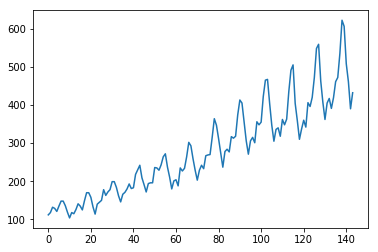

[[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123552]
 [0.04247104]
 [0.07142857]
 [0.05984556]
 [0.04054054]
 [0.08687259]
 [0.12741313]
 [0.12741313]
 [0.1042471 ]
 [0.05598456]
 [0.01930502]
 [0.06949807]
 [0.07915058]
 [0.08880309]
 [0.14285714]
 [0.11389961]
 [0.13127413]
 [0.14285714]
 [0.18339768]
 [0.18339768]
 [0.15444015]
 [0.11196911]
 [0.08108108]
 [0.11969112]
 [0.12934363]
 [0.14671815]
 [0.17181467]
 [0.14864865]
 [0.15250965]
 [0.22007722]
 [0.24324324]
 [0.26640927]
 [0.2027027 ]
 [0.16795367]
 [0.13127413]
 [0.17374517]
 [0.17760618]
 [0.17760618]
 [0.25482625]
 [0.25289575]
 [0.24131274]
 [0.26833977]
 [0.30888031]
 [0.32432432]
 [0.25675676]
 [0.20656371]
 [0.14671815]
 [0.18725869]
 [0.19305019]
 [0.16216216]
 [0.25289575]
 [0.23745174]
 [0.25096525]
 [0.30888031]
 [0.38223938]
 [0.36486486]
 [0.2992278 ]
 [0.24131274]
 [0.19111969]
 [0.24

C:\Users\212704539\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


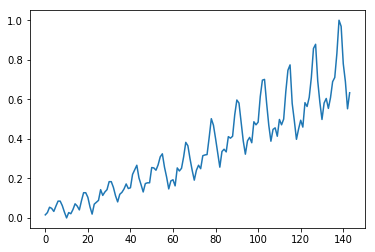

In [48]:
z = df['Passengers'].values
print(z)
plt.plot(z)
plt.show()
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
z = scaler.fit_transform(z.reshape(-1,1))
print(z)
plt.plot(z)
plt.show()

In [49]:
N = len(z)
print(N)
x = np.zeros(N-1)
y = np.zeros(N-1)
for i in range(N-1):
    x[i] = z[i]
    y[i] = z[i+1]
dfA = pd.DataFrame(columns=['x','y'])
dfA['x']=x
dfA['y']=y
display(dfA)

144


x         y
0    0.015444  0.027027
1    0.027027  0.054054
2    0.054054  0.048263
3    0.048263  0.032819
4    0.032819  0.059846
5    0.059846  0.084942
6    0.084942  0.084942
7    0.084942  0.061776
8    0.061776  0.028958
9    0.028958  0.000000
10   0.000000  0.027027
11   0.027027  0.021236
12   0.021236  0.042471
13   0.042471  0.071429
14   0.071429  0.059846
15   0.059846  0.040541
16   0.040541  0.086873
17   0.086873  0.127413
18   0.127413  0.127413
19   0.127413  0.104247
20   0.104247  0.055985
21   0.055985  0.019305
22   0.019305  0.069498
23   0.069498  0.079151
24   0.079151  0.088803
25   0.088803  0.142857
26   0.142857  0.113900
27   0.113900  0.131274
28   0.131274  0.142857
29   0.142857  0.183398
..        ...       ...
113  0.638996  0.747104
114  0.747104  0.774131
115  0.774131  0.579151
116  0.579151  0.492278
117  0.492278  0.397683
118  0.397683  0.449807
119  0.449807  0.494208
120  0.494208  0.459459
121  0.459459  0.583012
122  0.583012  0.563707
123  0.563707  0.610039
124  0.610039  0.710425
125  0.710425  0.857143
126  0.857143  0.878378
127  0.878378  0.693050
128  0.693050  0.584942
129  0.584942  0.498069
130  0.498069  0.581081
131  0.581081  0.604247
132  0.604247  0.554054
133  0.554054  0.608108
134  0.608108  0.689189
135  0.689189  0.710425
136  0.710425  0.832046
137  0.832046  1.000000
138  1.000000  0.969112
139  0.969112  0.779923
140  0.779923  0.689189
141  0.689189  0.552124
142  0.552124  0.633205

[143 rows x 2 columns]

In [66]:
step = 1
model = keras.Sequential()
model.add(SimpleRNN(units=4, input_shape=(1,step), activation="tanh"))
model.add(Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_11 (SimpleRNN)    (None, 4)                 24        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


We know x<sub>t</sub> = 1x1<br>
h<sub>t</sub> = 4<br>
W<sub>hh</sub> = 4 * 4 <br>
W<sub>xh</sub> = 4 * 1 <br>
b = 4 * 1 <br>
h<sub>t</sub> = tanh(W<sub>hh</sub> * h<sub>t-1</sub> + W<sub>xh</sub> * h<sub>t</sub> + b)<br>
So 24 parameters in RNN layer<br>
Dense is 4 * 1 + 1(for bias)

In [67]:
trainX = x[0:100]
trainY = y[0:100]
testX = x[100:len(x)]
testY = y[100:len(y)]
print(np.shape(trainX))
print(np.shape(trainY))
print(np.shape(testX))
print(np.shape(testY))
#reshaping input to [samples,stepback,features]
# reshaping output to [samples,features]
trainX = np.reshape(trainX,(np.shape(trainX)[0],1,1))
trainY = np.reshape(trainX,(np.shape(trainY)[0],1))
testX = np.reshape(testX,(np.shape(testX)[0],1,1))
testY = np.reshape(testY,(np.shape(testY)[0],1))
print(np.shape(trainX))
print(np.shape(trainY))
print(np.shape(testX))
print(np.shape(testY))


(100,)
(100,)
(43,)
(43,)
(100, 1, 1)
(100, 1)
(43, 1, 1)
(43, 1)


In [68]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=100, verbose=2)

Epoch 1/200
 - 1s - loss: 0.0305
Epoch 2/200
 - 0s - loss: 0.0294
Epoch 3/200
 - 0s - loss: 0.0284
Epoch 4/200
 - 0s - loss: 0.0274
Epoch 5/200
 - 0s - loss: 0.0264
Epoch 6/200
 - 0s - loss: 0.0254
Epoch 7/200
 - 0s - loss: 0.0244
Epoch 8/200
 - 0s - loss: 0.0234
Epoch 9/200
 - 0s - loss: 0.0225
Epoch 10/200
 - 0s - loss: 0.0216
Epoch 11/200
 - 0s - loss: 0.0207
Epoch 12/200
 - 0s - loss: 0.0198
Epoch 13/200
 - 0s - loss: 0.0189
Epoch 14/200
 - 0s - loss: 0.0181
Epoch 15/200
 - 0s - loss: 0.0173
Epoch 16/200
 - 0s - loss: 0.0166
Epoch 17/200
 - 0s - loss: 0.0158
Epoch 18/200
 - 0s - loss: 0.0151
Epoch 19/200
 - 0s - loss: 0.0145
Epoch 20/200
 - 0s - loss: 0.0138
Epoch 21/200
 - 0s - loss: 0.0132
Epoch 22/200
 - 0s - loss: 0.0126
Epoch 23/200
 - 0s - loss: 0.0120
Epoch 24/200
 - 0s - loss: 0.0115
Epoch 25/200
 - 0s - loss: 0.0110
Epoch 26/200
 - 0s - loss: 0.0105
Epoch 27/200
 - 0s - loss: 0.0101
Epoch 28/200
 - 0s - loss: 0.0097
Epoch 29/200
 - 0s - loss: 0.0093
Epoch 30/200
 - 0s - lo

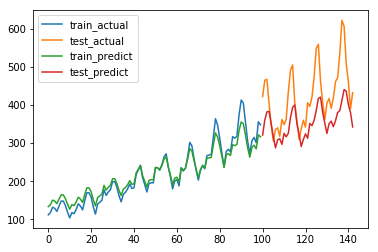

In [69]:
Ypredict_test = model.predict(testX)
Ypredict_test = scaler.inverse_transform(Ypredict_test)

Ypredict_train = model.predict(trainX)
Ypredict_train = scaler.inverse_transform(Ypredict_train)

Ytrain_actual = scaler.inverse_transform(trainY)
Ytest_actual = scaler.inverse_transform(testY)

pts1 = np.arange(0,100,1)
pts2 = np.arange(100,143,1)

plt.plot(pts1,Ytrain_actual,label='train_actual')
plt.plot(pts2,Ytest_actual,label='test_actual')
plt.plot(pts1,Ypredict_train,label='train_predict')
plt.plot(pts2,Ypredict_test,label='test_predict')
plt.legend()
plt.show()

In [70]:
step = 1
modelB = keras.Sequential()
modelB.add(SimpleRNN(units=4, input_shape=(1,step), activation="tanh"))
modelB.add(Dense(1))
modelB.summary()
modelB.compile(loss='mean_squared_error', optimizer='adam')
modelB.fit(trainX, trainY, epochs=400, batch_size=100, verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_12 (SimpleRNN)    (None, 4)                 24        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
 - 1s - loss: 0.0101
Epoch 2/400
 - 0s - loss: 0.0094
Epoch 3/400
 - 0s - loss: 0.0088
Epoch 4/400
 - 0s - loss: 0.0082
Epoch 5/400
 - 0s - loss: 0.0076
Epoch 6/400
 - 0s - loss: 0.0071
Epoch 7/400
 - 0s - loss: 0.0066
Epoch 8/400
 - 0s - loss: 0.0061
Epoch 9/400
 - 0s - loss: 0.0056
Epoch 10/400
 - 0s - loss: 0.0052
Epoch 11/400
 - 0s - loss: 0.0048
Epoch 12/400
 - 0s - loss: 0.0044
Epoch 13/400
 - 0s - loss: 0.0041
Epoch 14/400
 - 0s - loss: 0.0038
Epoch 15/400
 - 0s - loss: 0.0036
Epoch 16/400
 - 0s - loss: 0.0033
Epoch 1

Epoch 208/400
 - 0s - loss: 1.2551e-04
Epoch 209/400
 - 0s - loss: 1.2366e-04
Epoch 210/400
 - 0s - loss: 1.2186e-04
Epoch 211/400
 - 0s - loss: 1.2011e-04
Epoch 212/400
 - 0s - loss: 1.1840e-04
Epoch 213/400
 - 0s - loss: 1.1673e-04
Epoch 214/400
 - 0s - loss: 1.1510e-04
Epoch 215/400
 - 0s - loss: 1.1351e-04
Epoch 216/400
 - 0s - loss: 1.1196e-04
Epoch 217/400
 - 0s - loss: 1.1045e-04
Epoch 218/400
 - 0s - loss: 1.0898e-04
Epoch 219/400
 - 0s - loss: 1.0754e-04
Epoch 220/400
 - 0s - loss: 1.0614e-04
Epoch 221/400
 - 0s - loss: 1.0478e-04
Epoch 222/400
 - 0s - loss: 1.0345e-04
Epoch 223/400
 - 0s - loss: 1.0215e-04
Epoch 224/400
 - 0s - loss: 1.0089e-04
Epoch 225/400
 - 0s - loss: 9.9663e-05
Epoch 226/400
 - 0s - loss: 9.8463e-05
Epoch 227/400
 - 0s - loss: 9.7297e-05
Epoch 228/400
 - 0s - loss: 9.6160e-05
Epoch 229/400
 - 0s - loss: 9.5054e-05
Epoch 230/400
 - 0s - loss: 9.3975e-05
Epoch 231/400
 - 0s - loss: 9.2924e-05
Epoch 232/400
 - 0s - loss: 9.1902e-05
Epoch 233/400
 - 0s - los

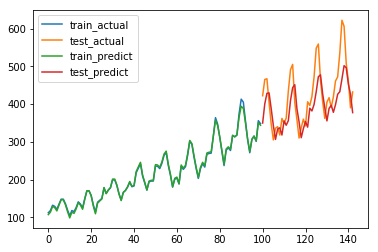

In [71]:
Ypredict_test = modelB.predict(testX)
Ypredict_test = scaler.inverse_transform(Ypredict_test)

Ypredict_train = modelB.predict(trainX)
Ypredict_train = scaler.inverse_transform(Ypredict_train)

Ytrain_actual = scaler.inverse_transform(trainY)
Ytest_actual = scaler.inverse_transform(testY)

pts1 = np.arange(0,100,1)
pts2 = np.arange(100,143,1)

plt.plot(pts1,Ytrain_actual,label='train_actual')
plt.plot(pts2,Ytest_actual,label='test_actual')
plt.plot(pts1,Ypredict_train,label='train_predict')
plt.plot(pts2,Ypredict_test,label='test_predict')
plt.legend()
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_13 (SimpleRNN)    (None, 6)                 48        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
 - 1s - loss: 0.0040
Epoch 2/400
 - 0s - loss: 0.0036
Epoch 3/400
 - 0s - loss: 0.0032
Epoch 4/400
 - 0s - loss: 0.0028
Epoch 5/400
 - 0s - loss: 0.0025
Epoch 6/400
 - 0s - loss: 0.0022
Epoch 7/400
 - 0s - loss: 0.0019
Epoch 8/400
 - 0s - loss: 0.0016
Epoch 9/400
 - 0s - loss: 0.0014
Epoch 10/400
 - 0s - loss: 0.0013
Epoch 11/400
 - 0s - loss: 0.0011
Epoch 12/400
 - 0s - loss: 9.8953e-04
Epoch 13/400
 - 0s - loss: 8.9653e-04
Epoch 14/400
 - 0s - loss: 8.2728e-04
Epoch 15/400
 - 0s - loss: 7.7915e-04
Epoch 16/400
 - 0s - loss

Epoch 200/400
 - 0s - loss: 1.8877e-05
Epoch 201/400
 - 0s - loss: 1.8875e-05
Epoch 202/400
 - 0s - loss: 1.8873e-05
Epoch 203/400
 - 0s - loss: 1.8871e-05
Epoch 204/400
 - 0s - loss: 1.8869e-05
Epoch 205/400
 - 0s - loss: 1.8867e-05
Epoch 206/400
 - 0s - loss: 1.8865e-05
Epoch 207/400
 - 0s - loss: 1.8864e-05
Epoch 208/400
 - 0s - loss: 1.8862e-05
Epoch 209/400
 - 0s - loss: 1.8860e-05
Epoch 210/400
 - 0s - loss: 1.8858e-05
Epoch 211/400
 - 0s - loss: 1.8856e-05
Epoch 212/400
 - 0s - loss: 1.8854e-05
Epoch 213/400
 - 0s - loss: 1.8852e-05
Epoch 214/400
 - 0s - loss: 1.8850e-05
Epoch 215/400
 - 0s - loss: 1.8849e-05
Epoch 216/400
 - 0s - loss: 1.8847e-05
Epoch 217/400
 - 0s - loss: 1.8845e-05
Epoch 218/400
 - 0s - loss: 1.8843e-05
Epoch 219/400
 - 0s - loss: 1.8841e-05
Epoch 220/400
 - 0s - loss: 1.8839e-05
Epoch 221/400
 - 0s - loss: 1.8837e-05
Epoch 222/400
 - 0s - loss: 1.8836e-05
Epoch 223/400
 - 0s - loss: 1.8834e-05
Epoch 224/400
 - 0s - loss: 1.8832e-05
Epoch 225/400
 - 0s - los

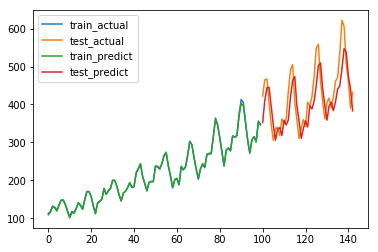

In [72]:
step = 1
modelC = keras.Sequential()
modelC.add(SimpleRNN(units=6, input_shape=(1,step), activation="tanh"))
modelC.add(Dense(1))
modelC.summary()
modelC.compile(loss='mean_squared_error', optimizer='adam')
modelC.fit(trainX, trainY, epochs=400, batch_size=100, verbose=2)
Ypredict_test = modelC.predict(testX)
Ypredict_test = scaler.inverse_transform(Ypredict_test)

Ypredict_train = modelC.predict(trainX)
Ypredict_train = scaler.inverse_transform(Ypredict_train)

Ytrain_actual = scaler.inverse_transform(trainY)
Ytest_actual = scaler.inverse_transform(testY)

pts1 = np.arange(0,100,1)
pts2 = np.arange(100,143,1)

plt.plot(pts1,Ytrain_actual,label='train_actual')
plt.plot(pts2,Ytest_actual,label='test_actual')
plt.plot(pts1,Ypredict_train,label='train_predict')
plt.plot(pts2,Ypredict_test,label='test_predict')
plt.legend()
plt.show()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.00987571  0.00399923 -0.00220255 -0.0087474  -0.01565363 -0.02293999
 -0.03062552 -0.03872934 -0.04727042 -0.05626727 -0.06573755 -0.07569756
 -0.08616176 -0.09714207 -0.10864709 -0.12068132 -0.13324413 -0.14632881
 -0.15992144 -0.17399997 -0.18853305 -0.20347933 -0.21878682 -0.23439258
 -0.25022283 -0.26619378 -0.28221267 -0.29817986 -0.31399116 -0.32954067
 -0.34472421 -0.35944256 -0.37360474 -0.38713092 -0.39995465 -0.41202459
 -0.42330512 -0.43377647 -0.44343373 -0.45228577 -0.46035311 -0.46766597
 -0.4742623  -0.48018539 -0.48548189 -0.49020046 -0.4

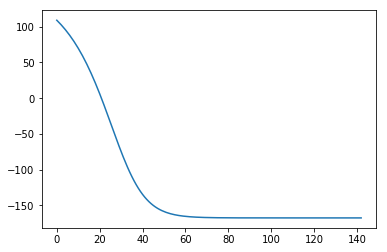

In [84]:
# Checking whether starting from some state can it predict all the next states
allFuture = np.zeros(143)
print(allFuture)
allFuture[0] = modelC.predict(trainX[0].reshape(1,1,1))
for i in range(1,143,1):
    allFuture[i] = modelC.predict(allFuture[i-1].reshape(1,1,1))
print(allFuture)
allFuture_inv = scaler.inverse_transform(allFuture.reshape(-1,1))
print(allFuture_inv)
plt.plot(allFuture_inv)

In [88]:
# start with some n values
# predict next value
# add it to array then predict next
# then predict next and so on
n = 2
print(x)
print(x[0:n])
allPredictValues = modelC.predict(x[0:n].reshape(n,1,1))
print(allPredictValues)

[0.01544402 0.02702703 0.05405405 0.04826255 0.03281853 0.05984556
 0.08494208 0.08494208 0.06177606 0.02895753 0.         0.02702703
 0.02123552 0.04247104 0.07142857 0.05984556 0.04054054 0.08687259
 0.12741313 0.12741313 0.1042471  0.05598456 0.01930502 0.06949807
 0.07915058 0.08880309 0.14285714 0.11389961 0.13127413 0.14285714
 0.18339768 0.18339768 0.15444015 0.11196911 0.08108108 0.11969112
 0.12934363 0.14671815 0.17181467 0.14864865 0.15250965 0.22007722
 0.24324324 0.26640927 0.2027027  0.16795367 0.13127413 0.17374517
 0.17760618 0.17760618 0.25482625 0.25289575 0.24131274 0.26833977
 0.30888031 0.32432432 0.25675676 0.20656371 0.14671815 0.18725869
 0.19305019 0.16216216 0.25289575 0.23745174 0.25096525 0.30888031
 0.38223938 0.36486486 0.2992278  0.24131274 0.19111969 0.24131274
 0.26640927 0.24903475 0.31467181 0.31853282 0.32046332 0.40733591
 0.5019305  0.46911197 0.4015444  0.32818533 0.25675676 0.33590734
 0.34749035 0.33397683 0.41119691 0.4034749  0.41312741 0.5212